In [1]:
fig_dir = "../../figures"
fig_ext = "pdf"

In [2]:
import matplotlib.pyplot as plt
from gwpy import time

/home/daniel/.virtualenvs/IGRlaptop21/thesis/lib/python2.7/site-packages/h5py-2.7.0-py2.7-linux-x86_64.egg/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
import thesis

In [4]:
from gwpy.timeseries import TimeSeries
hdata = TimeSeries.fetch_open_data('H1', 1126259446, 1126259478)
ldata = TimeSeries.fetch_open_data('L1', 1126259446, 1126259478)

Bandpass the data (GW150914 is a comparitively low-frequency signal, so it lives in a low-frequency regime between 50 and 250-Hz).

In [5]:
from gwpy.signal import filter_design
bp = filter_design.bandpass(50, 250, hdata.sample_rate)

Apply a notch filter to remove the AC 60-Hz line and its higher harmonics.

In [6]:
notches = [filter_design.notch(line, hdata.sample_rate) for
           line in (60, 120, 180)]
zpk = filter_design.concatenate_zpks(bp, *notches)

In [7]:
hfilt = hdata.filter(zpk, filtfilt=True)
lfilt = ldata.filter(zpk, filtfilt=True)

/home/daniel/.virtualenvs/IGRlaptop21/thesis/lib/python2.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [8]:
hdata = hdata.crop(*hdata.span.contract(1))
hfilt = hfilt.crop(*hfilt.span.contract(1))
lfilt = lfilt.crop(*lfilt.span.contract(1))

/home/daniel/.virtualenvs/IGRlaptop21/thesis/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/daniel/.virtualenvs/IGRlaptop21/thesis/lib/python2.7/site-packages/matplotlib/backends/backend_pdf.py:1120: UserWarning: 'SourceCodePro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


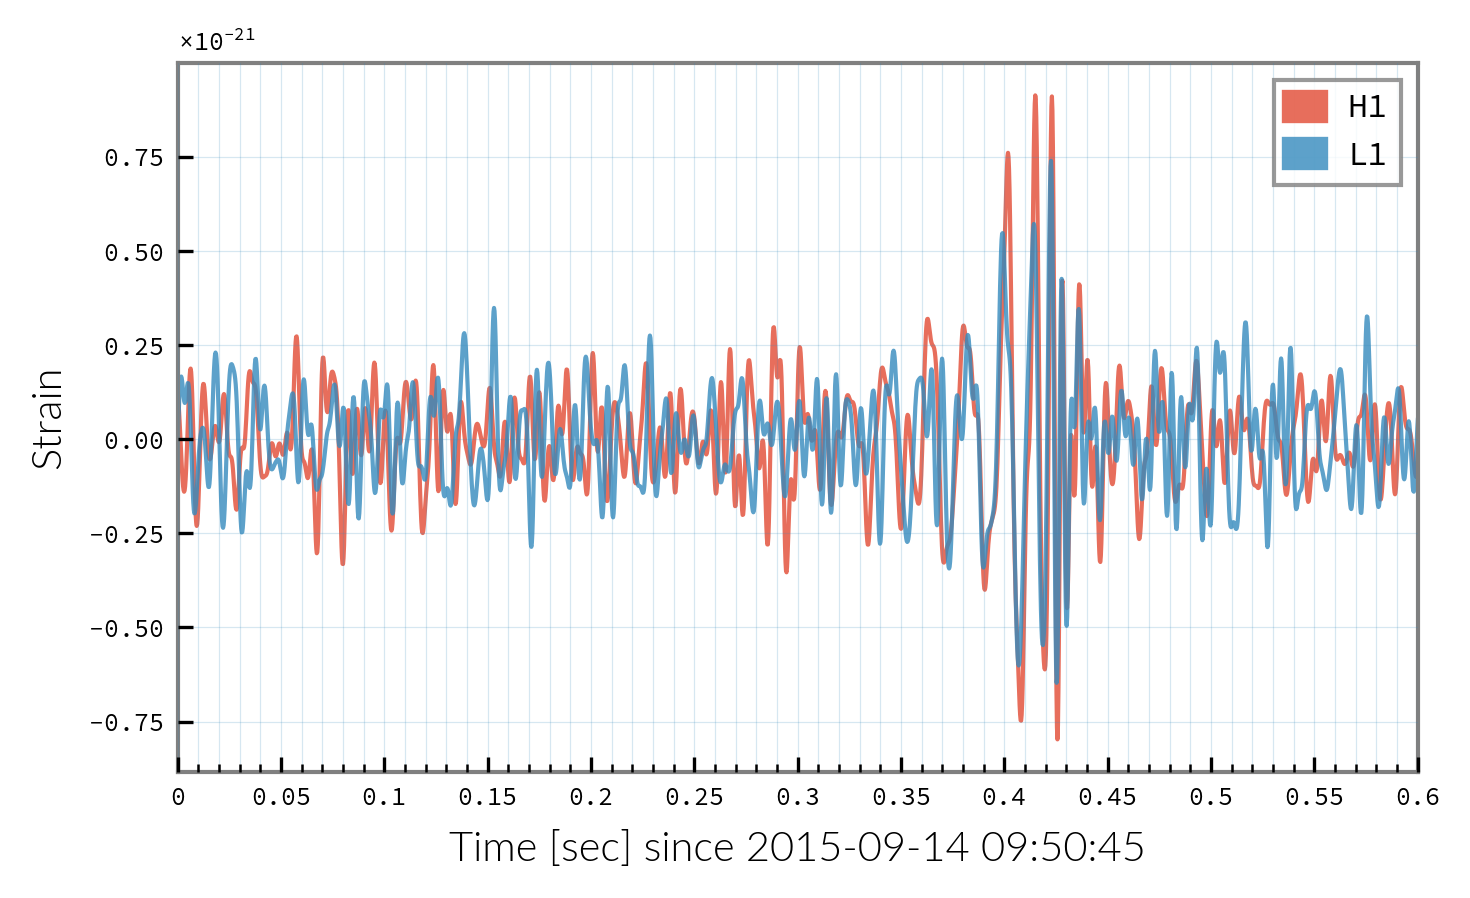

In [9]:
f, ax = plt.subplots(1,1, dpi=300)
ax.plot(hfilt.times.value, hfilt.value, alpha=0.8, lw=1, label="H1")

lfilt.shift('6.9ms')
lfilt *= -1

ax.plot(lfilt.times.value, lfilt.value, alpha=0.8, lw=1, label="L1")
ax.set_xlabel("Time [sec] since {}".format(time.from_gps(1126259462)))
ax.set_xlim(1126259462, 1126259462.6)
#ax.get_yaxis().get_major_formatter()._useMathText=False
ax.set_xscale('seconds', epoch=1126259462)
ax.set_ylabel("Strain")
ax.legend(prop=thesis.ssp_legend)
thesis.thesisify(f);

f.savefig("{}/intro/gw150914-waveform.{}".format(fig_dir, fig_ext))